In [69]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv(r'C:\Users\adina\Downloads\titanic_dataset (3).csv', encoding='latin1')

In [71]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
#1
data.set_index('PassengerId', inplace=True)

In [73]:
data.shape

(891, 11)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [75]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [76]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [77]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [78]:
data['Cabin'].fillna('Unknown', inplace=True)

In [79]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [80]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [81]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [82]:
outlier_cols = ['Age', 'Fare', 'SibSp']

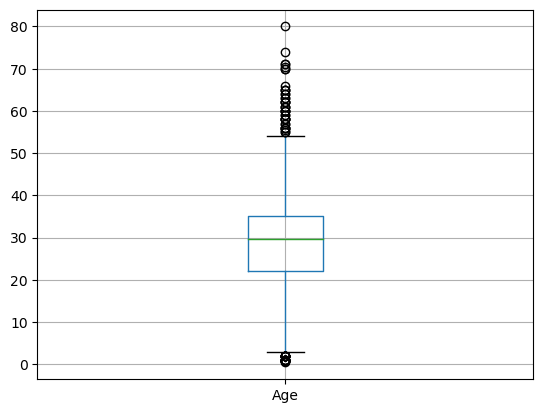

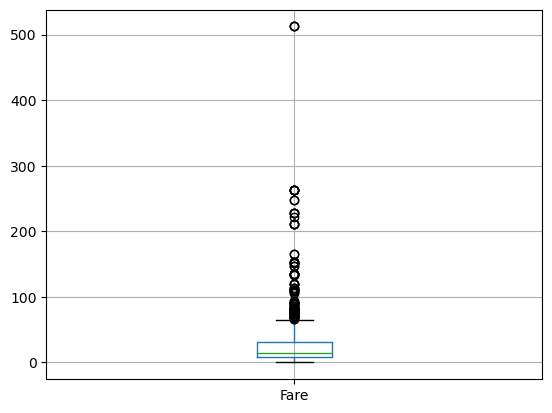

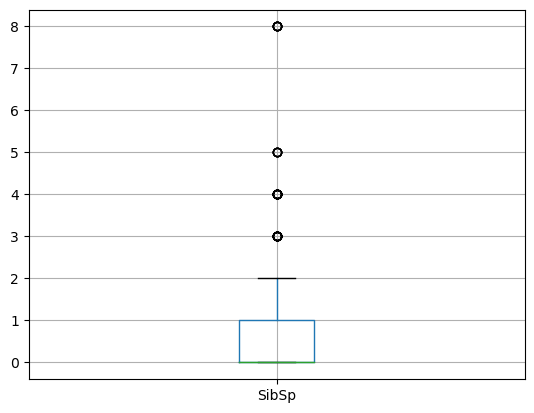

In [83]:
for column in outlier_cols:
    data.boxplot(column=column)
    plt.show()

In [84]:
from scipy import stats
for column in outlier_cols:
    z_scores = stats.zscore(data[column])
    data[column] = data[column].where(abs(z_scores) <= 3, data[column].median())

In [88]:
#Label encoding for categorical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
le = LabelEncoder()
data['Survived'] = le.fit_transform(data['Survived'])

In [89]:
features = data.drop('Survived', axis=1)
target = data['Survived']

scaler = MinMaxScaler()

num_features = features.select_dtypes(include=['float64', 'int64'])
num_features_scaled = scaler.fit_transform(num_features)
num_features_scaled_data = pd.DataFrame(num_features_scaled, columns=num_features.columns)

features_scaled = pd.concat([num_features_scaled_data, features.select_dtypes(exclude=['float64', 'int64'])], axis=1)

features_scaled['Survived'] = target

In [90]:
print(features_scaled.head())

   Pclass       Age     SibSp  Parch      Fare  \
0     1.0  0.329064  0.333333    0.0  0.043975   
1     0.0  0.573041  0.333333    0.0  0.432369   
2     1.0  0.390058  0.000000    0.0  0.048069   
3     0.0  0.527295  0.333333    0.0  0.322078   
4     1.0  0.527295  0.000000    0.0  0.048827   

                                                Name     Sex  \
0                                                NaN     NaN   
1                            Braund, Mr. Owen Harris    male   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                             Heikkinen, Miss. Laina  female   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   

             Ticket    Cabin Embarked  Survived  
0               NaN      NaN      NaN       NaN  
1         A/5 21171  Unknown        S       0.0  
2          PC 17599      C85        C       1.0  
3  STON/O2. 3101282  Unknown        S       1.0  
4            113803     C123        S       1.0  


In [91]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
